In [1]:
import pickle
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
with open("times.pkl", "rb") as f:
    times = pickle.load(f)

In [3]:
argrelmax = defaultdict(lambda: [])
cpp_argrelmax = defaultdict(lambda: [])
rs_argrelmax = defaultdict(lambda: [])

In [4]:
for (length, order, exp), time in times.items():
    length = int(length)
    order = int(order)
    argrelmax[(length, order)].append(time["argrelmax"])
    cpp_argrelmax[(length, order)].append(time["cpp_argrelmax"])
    rs_argrelmax[(length, order)].append(time["rs_argrelmax"])

In [5]:
lengths = sorted(set(key[0] for key in argrelmax.keys()))
orders = sorted(set(key[1] for key in argrelmax.keys()))

In [6]:
argrelmax_df = [pd.DataFrame(index=lengths, columns=orders) for i in range(2)]
cpp_argrelmax_df = [pd.DataFrame(index=lengths, columns=orders) for i in range(2)]
rs_argrelmax_df = [pd.DataFrame(index=lengths, columns=orders) for i in range(2)]

In [7]:
for (index, column), value in argrelmax.items():
    argrelmax_df[0].at[index, column] = np.mean(value)
    argrelmax_df[1].at[index, column] = np.std(value)

for (index, column), value in cpp_argrelmax.items():
    cpp_argrelmax_df[0].at[index, column] = np.mean(value)
    cpp_argrelmax_df[1].at[index, column] = np.std(value)

for (index, column), value in rs_argrelmax.items():
    rs_argrelmax_df[0].at[index, column] = np.mean(value)
    rs_argrelmax_df[1].at[index, column] = np.std(value)

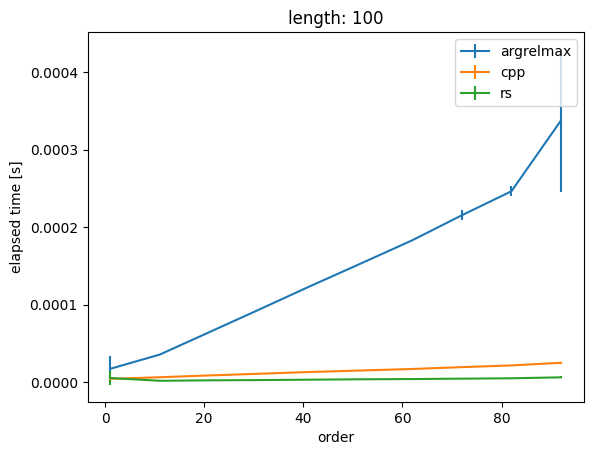

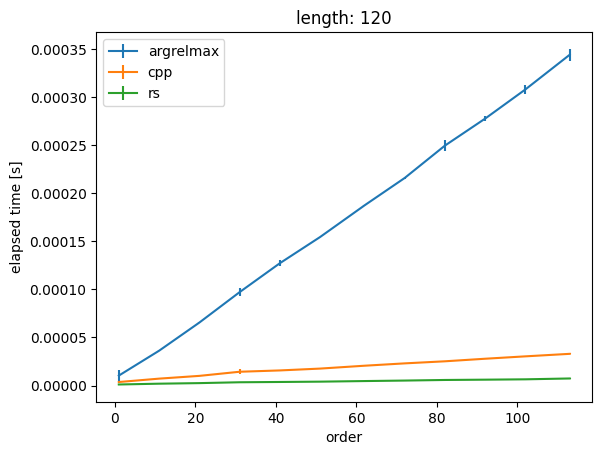

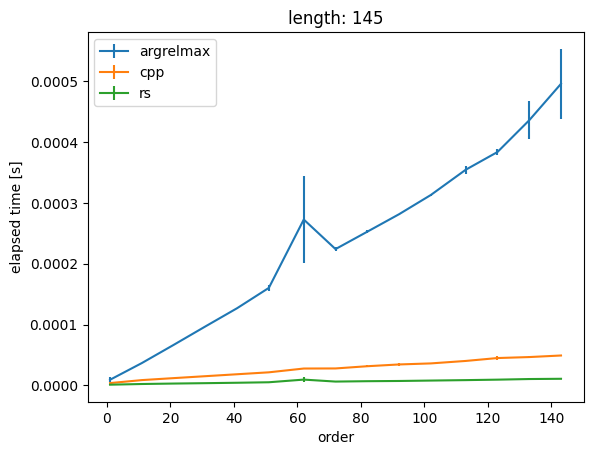

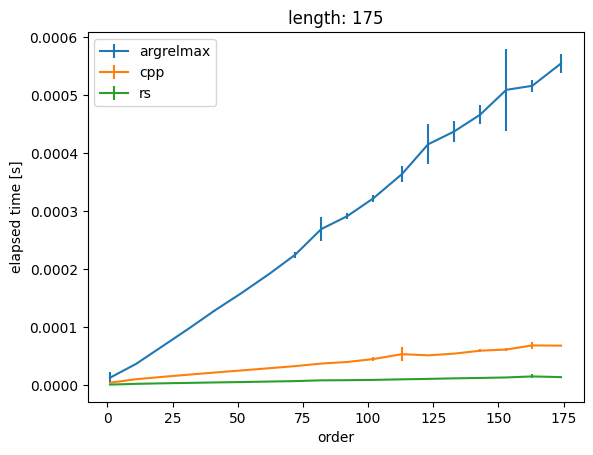

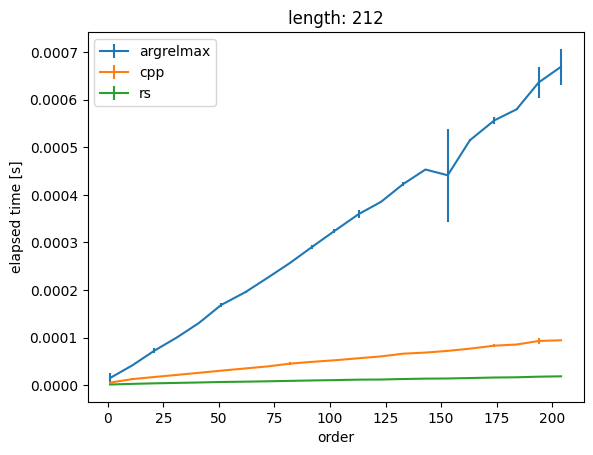

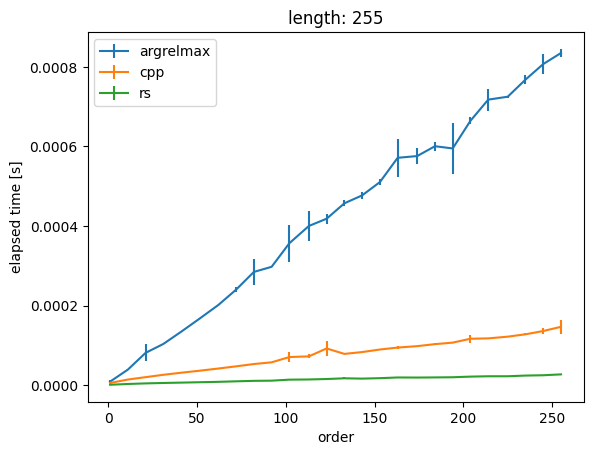

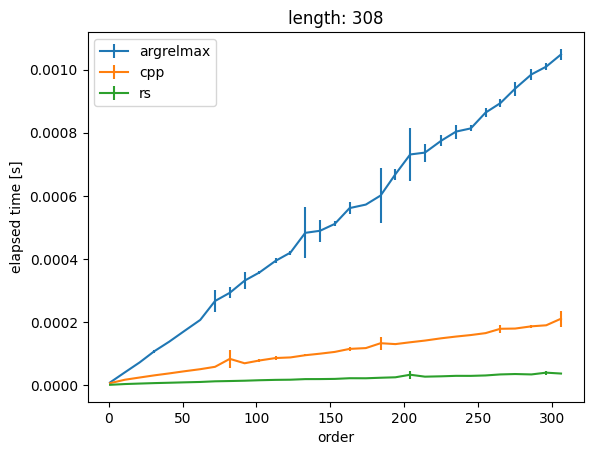

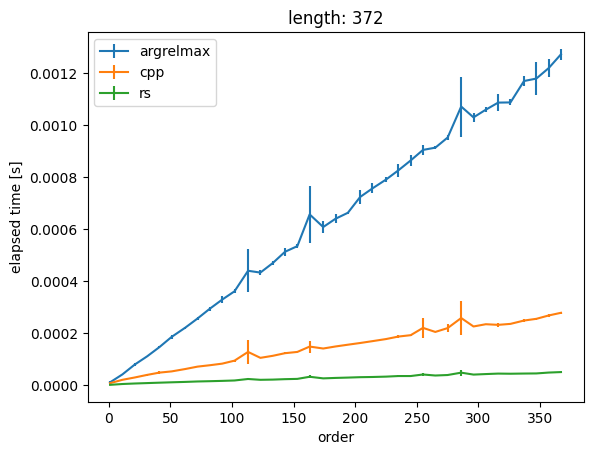

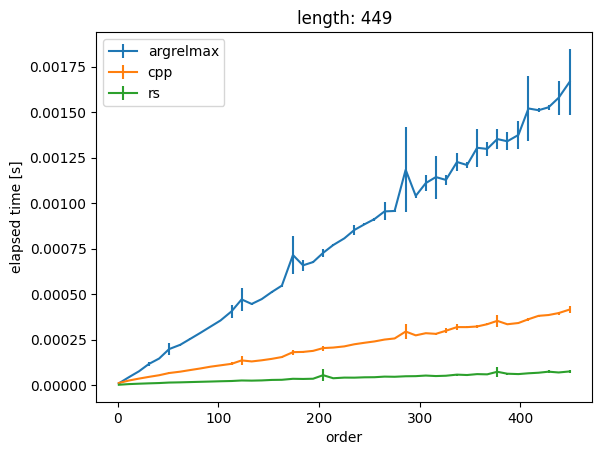

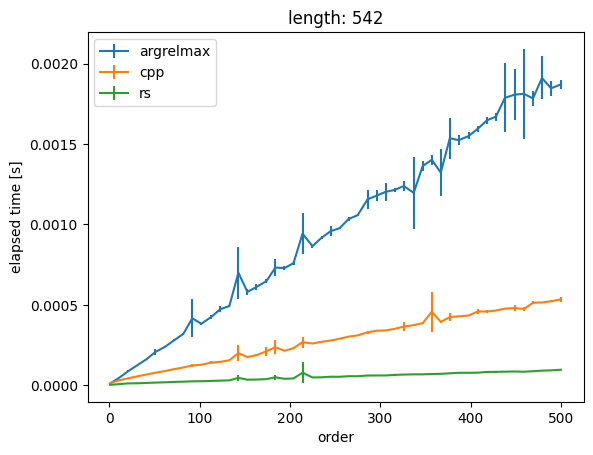

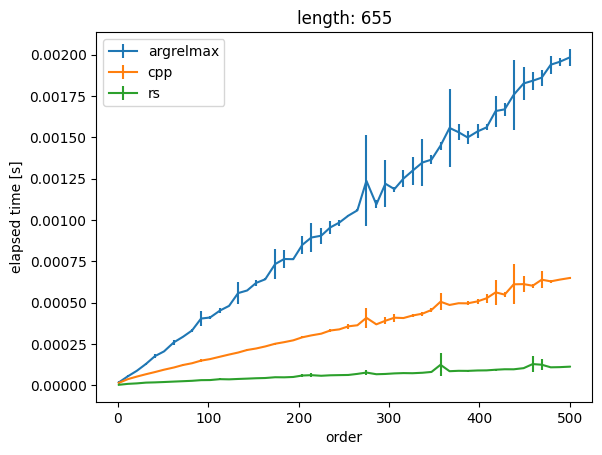

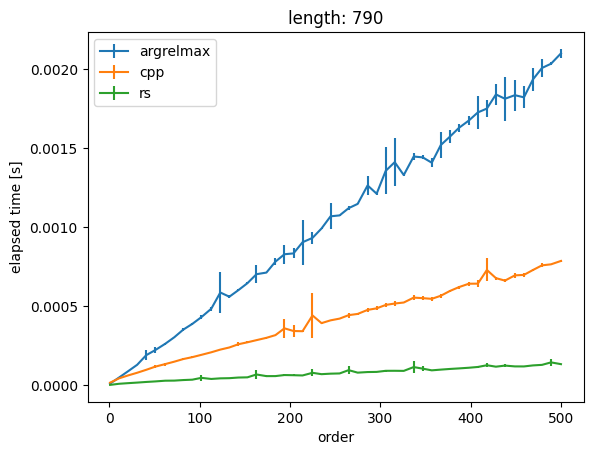

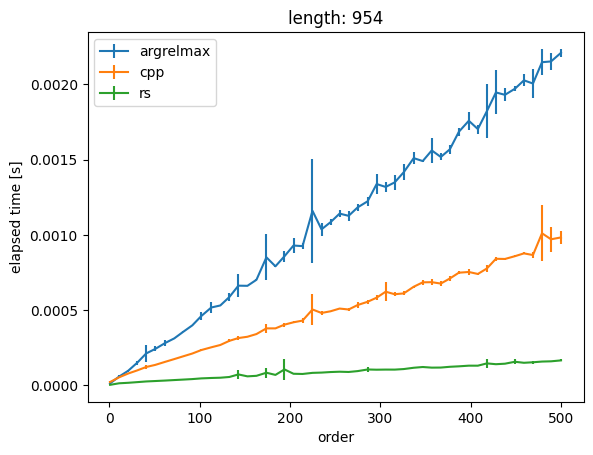

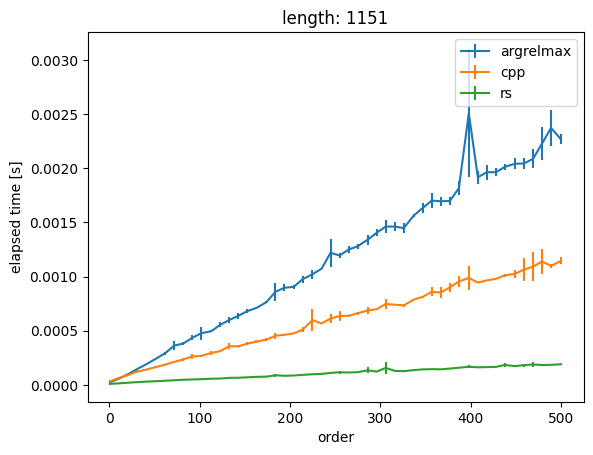

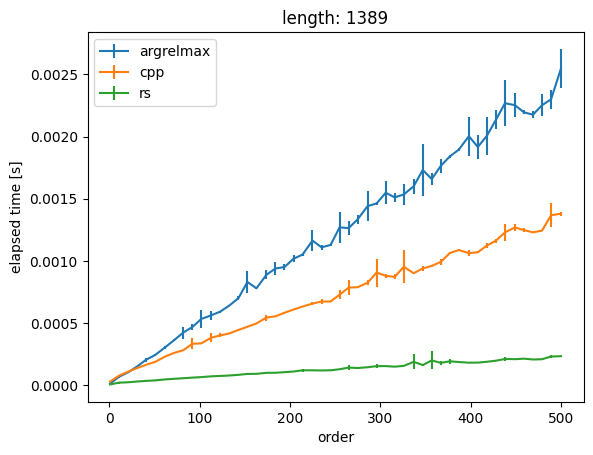

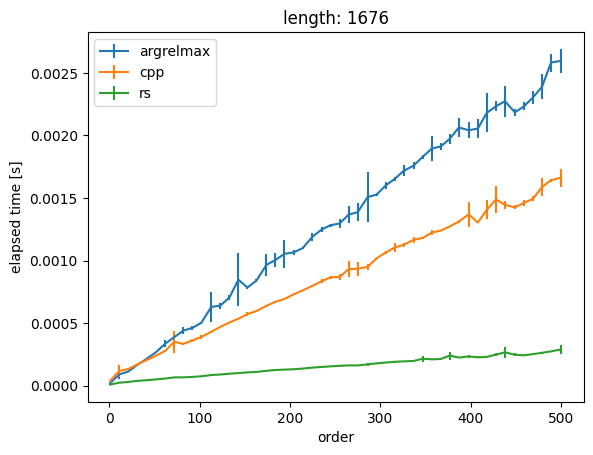

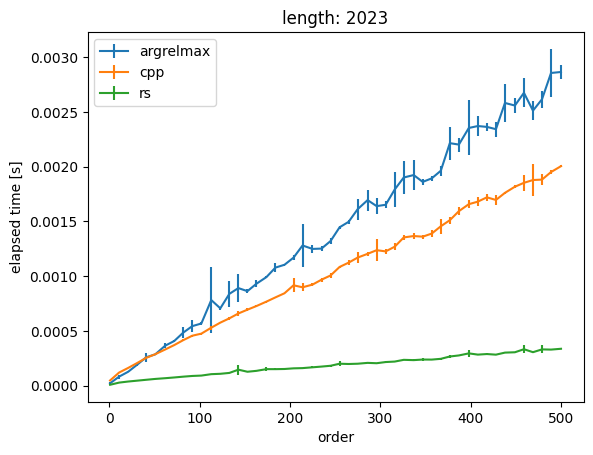

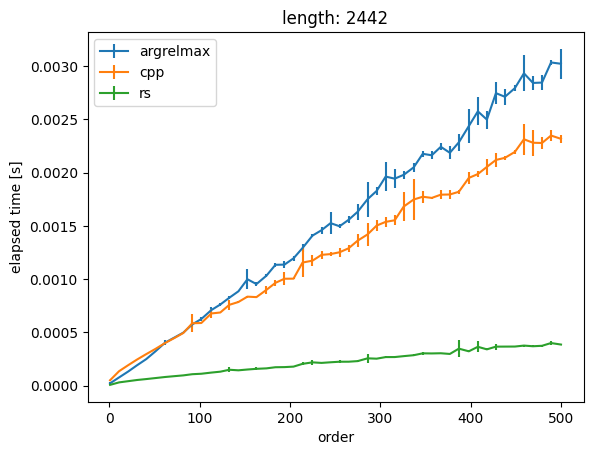

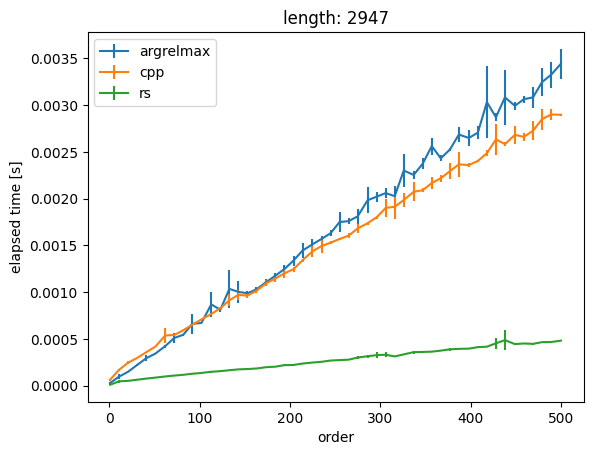

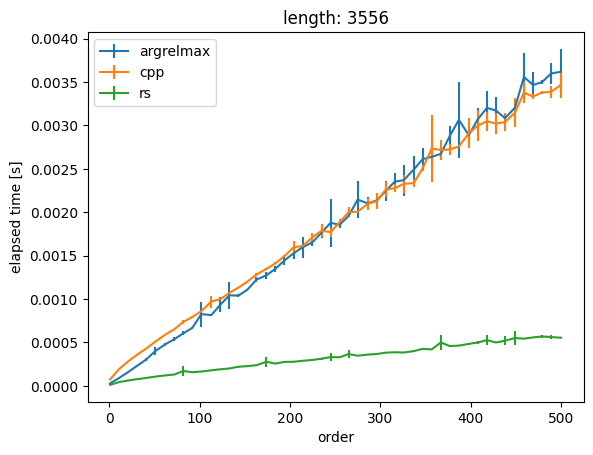

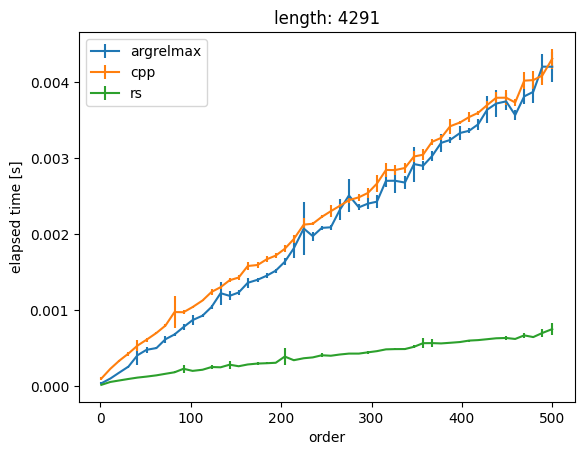

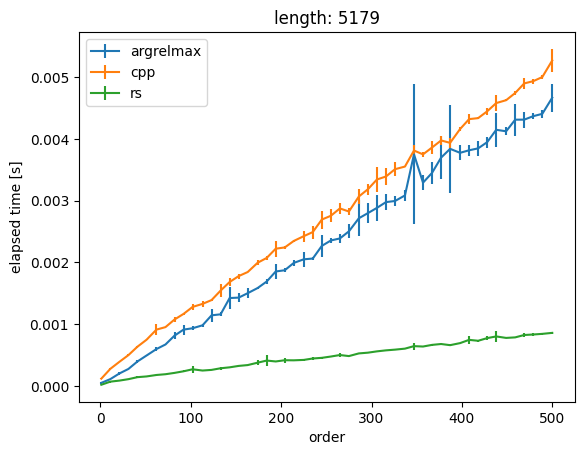

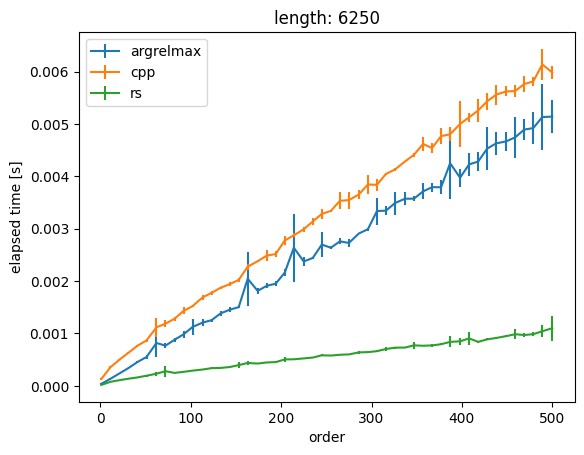

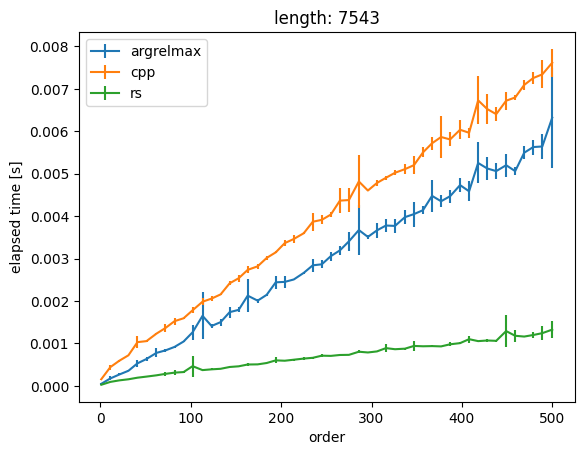

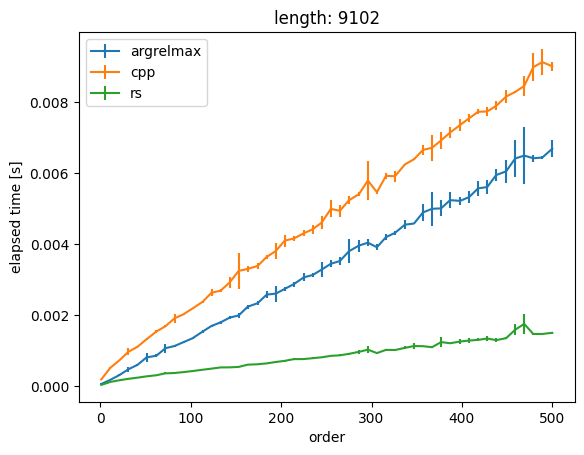

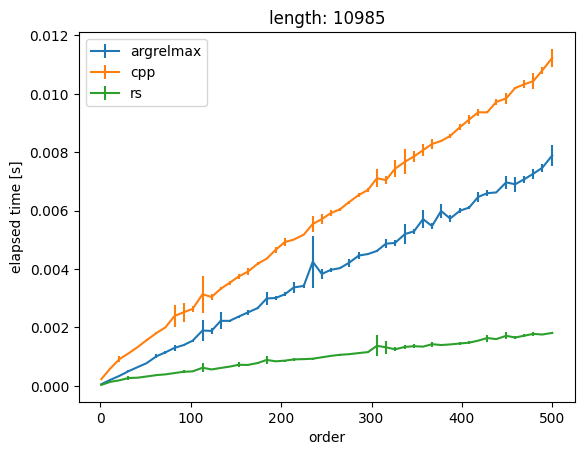

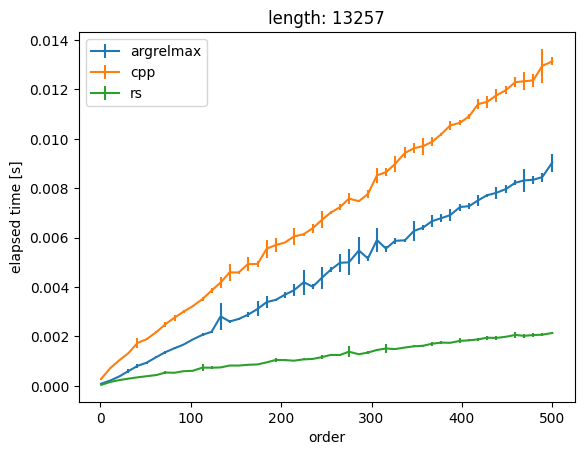

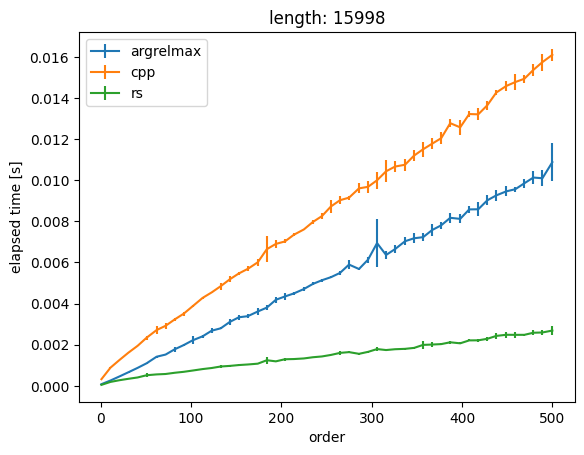

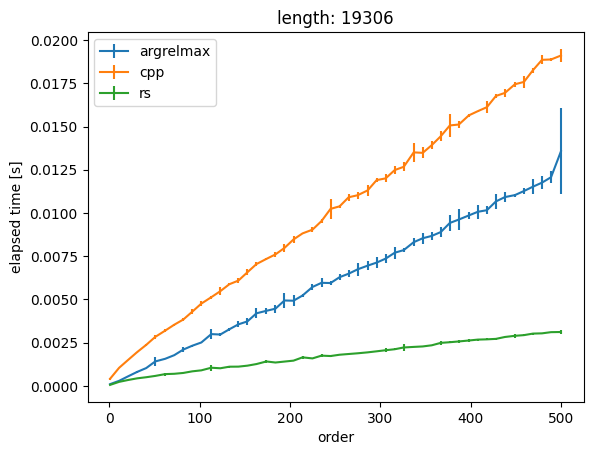

In [ ]:
for length in lengths:
    plt.errorbar(orders, argrelmax_df[0].loc[length], argrelmax_df[1].loc[length], label="argrelmax")
    plt.errorbar(orders, cpp_argrelmax_df[0].loc[length], cpp_argrelmax_df[1].loc[length], label="cpp")
    plt.errorbar(orders, rs_argrelmax_df[0].loc[length], rs_argrelmax_df[1].loc[length], label="rs")
    plt.legend(loc="best")
    plt.xlabel("order")
    plt.ylabel("elapsed time [s]")
    plt.title(f"length: {length}")
    plt.show()

In [ ]:
for order in orders:
    print(order)
    plt.errorbar(lengths, argrelmax_df[0].loc[:, order], argrelmax_df[1].loc[:, order], label="argrelmax")
    plt.errorbar(lengths, cpp_argrelmax_df[0].loc[:, order], cpp_argrelmax_df[1].loc[:, order], label="cpp")
    plt.errorbar(lengths, rs_argrelmax_df[0].loc[:, order], rs_argrelmax_df[1].loc[:, order], label="rs")
    plt.legend(loc="best")
    plt.xscale("log")
    plt.xlabel("length")
    plt.ylabel("elapsed time [s]")
    plt.title(f"order: {order}")
    plt.show()